# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression, LassoCV, LinearRegression, Ridge, Lasso
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, auc, precision_recall_curve, mean_squared_error
)

from pprint import pprint

pd.set_option("display.max_colwidth", 120)

In [ ]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix'):
    fig, ax = plt.subplots(figsize=(4.5, 4))
    im = ax.imshow(cm, interpolation='nearest')
    ax.set_title(title)
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks); ax.set_xticklabels(classes, rotation=45, ha='right')
    ax.set_yticks(tick_marks); ax.set_yticklabels(classes)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, cm[i, j], ha='center', va='center')
    ax.set_ylabel('True label'); ax.set_xlabel('Predicted label')
    plt.tight_layout(); plt.show()

def summarize_metrics(y_true, y_pred, labels):
    print("Accuracy:", round(accuracy_score(y_true, y_pred), 4))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=labels))

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [ ]:
df = pd.concat([X, y], axis=1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


# Cleaning the Data and Exploratory Data Analysis

In [ ]:
df[df.isna().any(axis=1)]
# df.dropna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
87,53,0,3,128,216,0,2,115,0,0.0,1,0.0,NaN,0
166,52,1,3,138,223,0,0,169,0,0.0,1,NaN,3.0,0
192,43,1,4,132,247,1,2,143,1,0.1,2,NaN,7.0,1
266,52,1,4,128,204,1,0,156,1,1.0,2,0.0,NaN,2
287,58,1,2,125,220,0,0,144,0,0.4,2,NaN,7.0,0
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0,0


In [ ]:
# Verify variables fall within the ranges reported by the description.
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


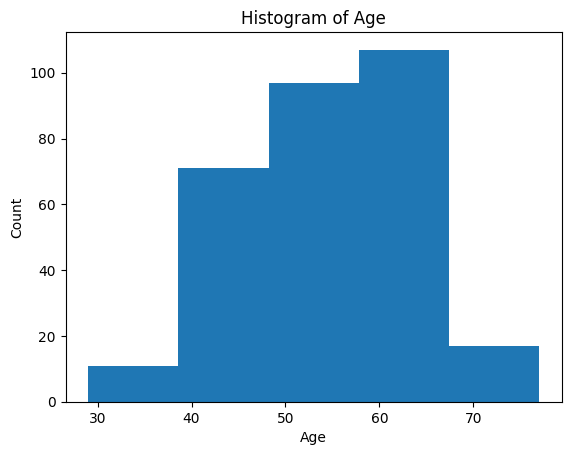

In [ ]:
# 1. Histogram → check missing + skew
plt.hist(df["age"], bins=5)
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

<Figure size 800x500 with 0 Axes>

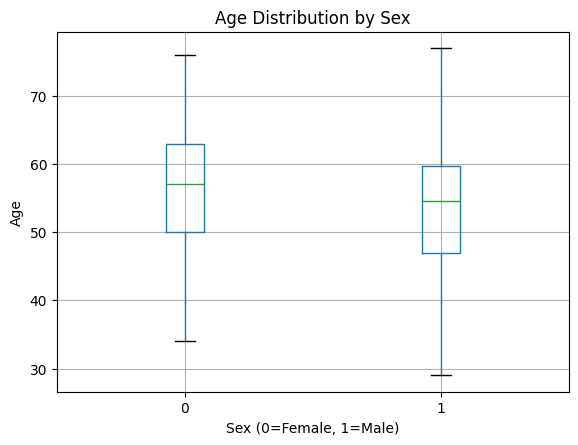

In [ ]:
plt.figure(figsize=(8, 5))
df.boxplot(column='age', by='sex')
plt.title('Age Distribution by Sex')
plt.suptitle('')  # Remove the automatic title
plt.xlabel('Sex (0=Female, 1=Male)')
plt.ylabel('Age')
plt.show()

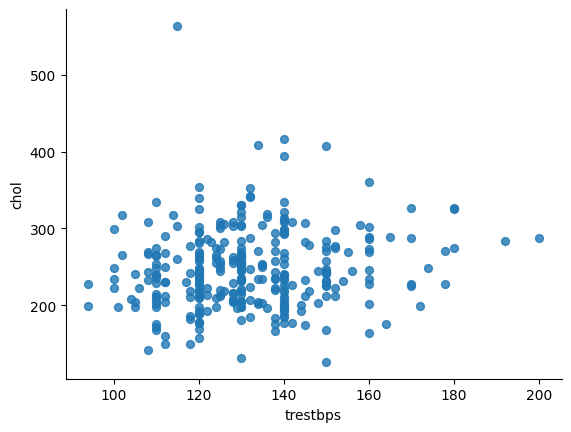

In [ ]:
# Curious to see resting heart rate and cholestorol
df.plot(kind='scatter', x='trestbps', y='chol', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# Feature Engineering

In [ ]:
# Assignment is a binary classification task, will convert the continuous target into binary
df['target_binary'] = (df['num'] > 0).astype(int)

Text(0.5, 1.0, 'Class Distribution')

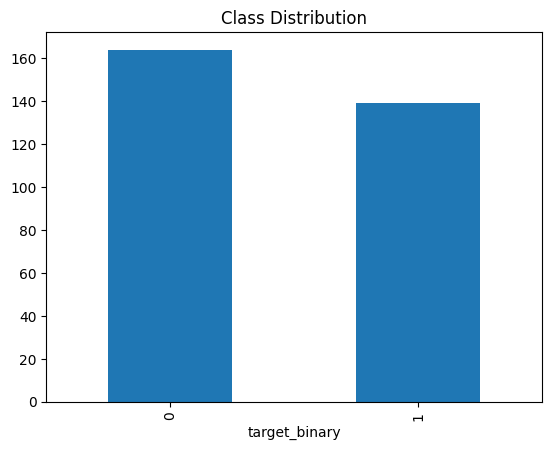

In [ ]:
df['target_binary'].value_counts().plot(kind='bar')
plt.title('Class Distribution')

Text(0.5, 1.0, 'Cleveland Study Main Feature Correlations with Target')

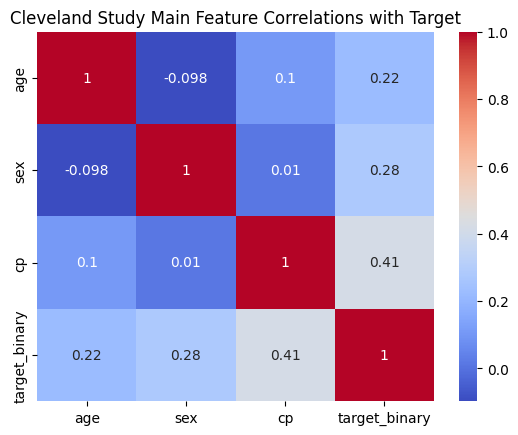

In [ ]:
sns.heatmap(df[['age', 'sex', 'cp', 'target_binary']].corr(), annot=True, cmap='coolwarm')
plt.title('Cleveland Study Main Feature Correlations with Target')

In [ ]:
# One-hot encode directly into df
df = pd.get_dummies(df, columns=['cp', 'restecg', 'slope', 'thal'], drop_first=False)

In [ ]:
cols_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Create new scaled columns
standard_scaler = StandardScaler()
df[[col + '_standard_scaled' for col in cols_to_scale]] = standard_scaler.fit_transform(df[cols_to_scale])

# Create new scaled columns
minmax_scaler = MinMaxScaler()
df[[col + '_minmax_scaled' for col in cols_to_scale]] = minmax_scaler.fit_transform(df[cols_to_scale])

df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,num,...,age_standard_scaled,trestbps_standard_scaled,chol_standard_scaled,thalach_standard_scaled,oldpeak_standard_scaled,age_minmax_scaled,trestbps_minmax_scaled,chol_minmax_scaled,thalach_minmax_scaled,oldpeak_minmax_scaled
0,63,1,145,233,1,150,0,2.3,0.0,0,...,0.948726,0.757525,-0.264900,0.017197,1.087338,0.708333,0.481132,0.244292,0.603053,0.370968
1,67,1,160,286,0,108,1,1.5,3.0,2,...,1.392002,1.611220,0.760415,-1.821905,0.397182,0.791667,0.622642,0.365297,0.282443,0.241935
2,67,1,120,229,0,129,1,2.6,2.0,1,...,1.392002,-0.665300,-0.342283,-0.902354,1.346147,0.791667,0.245283,0.235160,0.442748,0.419355
3,37,1,130,250,0,187,0,3.5,0.0,0,...,-1.932564,-0.096170,0.063974,1.637359,2.122573,0.166667,0.339623,0.283105,0.885496,0.564516
4,41,0,130,204,0,172,0,1.4,0.0,0,...,-1.489288,-0.096170,-0.825922,0.980537,0.310912,0.250000,0.339623,0.178082,0.770992,0.225806


# Model Training

## Naive Bayes Gaussian Classifier

In [ ]:
# Define y
y = df['target_binary']

# Define X without the target
X = df.drop('target_binary', axis=1)

# Split once
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=99, stratify=y)

# Then select columns for each model
continuous_standard_scaled_cols = ['age_standard_scaled', 'trestbps_standard_scaled', 'chol_standard_scaled',
                   'thalach_standard_scaled', 'oldpeak_standard_scaled']
continuous_minmax_scaled_cols = ['age_minmax_scaled', 'trestbps_minmax_scaled', 'chol_minmax_scaled',
                   'thalach_minmax_scaled', 'oldpeak_minmax_scaled']
binary_cols = ['sex', 'fbs', 'exang', 'cp_1', 'cp_2', 'cp_3', 'cp_4',
               'restecg_0', 'restecg_1', 'restecg_2', 'slope_1', 'slope_2',
               'slope_3', 'thal_3.0', 'thal_6.0', 'thal_7.0']

In [ ]:
# Trying the minmax scaled variables
X_train_continuous = X_train[continuous_minmax_scaled_cols]
X_test_continuous = X_test[continuous_minmax_scaled_cols]

# Try different alpha values
for smoothing in [0, 1e-9, 1e-5, 1e-1, 1.0, 10]:
    model = GaussianNB(var_smoothing=smoothing)
    model.fit(X_train_continuous, y_train)
    y_pred = model.predict(X_test_continuous)
    acc = accuracy_score(y_test, y_pred)
    print(f"var_smoothing={smoothing}: Accuracy={acc:.4f}")

var_smoothing=0: Accuracy=0.7705
var_smoothing=1e-09: Accuracy=0.7705
var_smoothing=1e-05: Accuracy=0.7705
var_smoothing=0.1: Accuracy=0.7705
var_smoothing=1.0: Accuracy=0.7213
var_smoothing=10: Accuracy=0.6393


In [ ]:
# Trying the standard scaled variables
X_train_continuous = X_train[continuous_standard_scaled_cols]
X_test_continuous = X_test[continuous_standard_scaled_cols]

# Try different alpha values
for smoothing in [0, 1e-9, 1e-3, 1e-1, 1.0, 10]:
    model = GaussianNB(var_smoothing=smoothing)
    model.fit(X_train_continuous, y_train)
    y_pred = model.predict(X_test_continuous)
    acc = accuracy_score(y_test, y_pred)
    print(f"var_smoothing={smoothing}: Accuracy={acc:.4f}")

var_smoothing=0: Accuracy=0.7705
var_smoothing=1e-09: Accuracy=0.7705
var_smoothing=0.001: Accuracy=0.7705
var_smoothing=0.1: Accuracy=0.7705
var_smoothing=1.0: Accuracy=0.7377
var_smoothing=10: Accuracy=0.6557


Accuracy: 0.7705

Classification Report:
              precision    recall  f1-score   support

  No Disease       0.77      0.82      0.79        33
     Disease       0.77      0.71      0.74        28

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



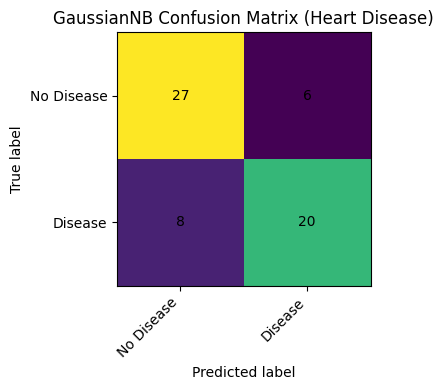

In [ ]:
# Using the standard scaled data
model_gnb = GaussianNB(var_smoothing=1e-9)  # Default, very small smoothing

model_gnb.fit(X_train_continuous, y_train)

y_pred_gnb = model_gnb.predict(X_test_continuous)

names = df.target_binary

names = ['No Disease', 'Disease']  # Class labels
summarize_metrics(y_test, y_pred_gnb, names)
cm_gnb = confusion_matrix(y_test, y_pred_gnb)
plot_confusion_matrix(cm_gnb, names, title='GaussianNB Confusion Matrix (Heart Disease)')

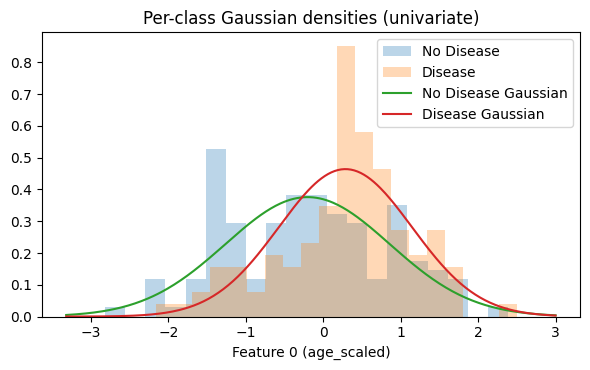

In [ ]:
# Get unique classes
classes = np.unique(y_train)

# Choose one feature to visualize (e.g., age_scaled, chol_scaled)
feat_idx = 0  # 0=age_scaled, 1=trestbps_scaled, 2=chol_scaled, etc.

# Calculate mu, sigma for each class (univariate)
mus = []
sigmas = []
for c in classes:
    mu = X_train_continuous[y_train == c].iloc[:, feat_idx].mean()
    sigma = X_train_continuous[y_train == c].iloc[:, feat_idx].std(ddof=1)
    mus.append(mu)
    sigmas.append(sigma)

# Plot histograms + Gaussian pdf curves
feature_names = ['age_scaled', 'trestbps_scaled', 'chol_scaled', 'thalach_scaled', 'oldpeak_scaled']
xmin, xmax = X_train_continuous.iloc[:, feat_idx].min() - 0.5, X_train_continuous.iloc[:, feat_idx].max() + 0.5
xs = np.linspace(xmin, xmax, 300)

plt.figure(figsize=(6, 3.8))
bins = 20
class_names = ['No Disease', 'Disease']

for c in classes:
    plt.hist(X_train_continuous[y_train == c].iloc[:, feat_idx], bins=bins, alpha=0.3, density=True, label=class_names[c])

for c in classes:
    mu, sigma = mus[c], sigmas[c]
    pdf = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((xs - mu) / sigma)**2)
    plt.plot(xs, pdf, label=f'{class_names[c]} Gaussian')

plt.xlabel(f"Feature {feat_idx} ({feature_names[feat_idx]})")
plt.title("Per-class Gaussian densities (univariate)")
plt.legend()
plt.tight_layout()
plt.show()

## Linear Regression (regress 0/1, then threshold at 0.5)

---



This is **not** a classifier; we fit a regression to targets {0,1}, then convert predictions to labels via a 0.5 threshold.


LinearRegression (0/1) accuracy: 0.754

Classification report (Linear Regression):
               precision    recall  f1-score   support

  No Disease       0.78      0.76      0.77        33
     Disease       0.72      0.75      0.74        28

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



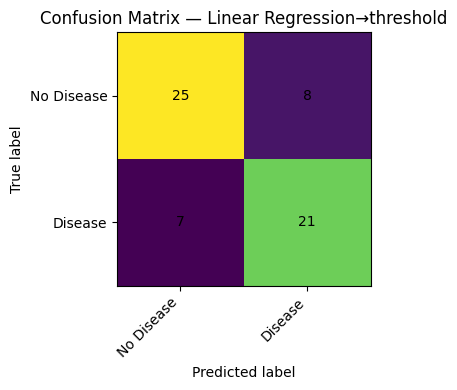

In [ ]:
# using the same test/train split as earlier, on the standard scaled variables
lr = LinearRegression()
lr.fit(X_train_continuous, y_train)        # regress on 0/1
score_lr = lr.predict(X_test_continuous)   # continuous
yhat_lr = (score_lr >= 0.5).astype(int)

labels = ['No Disease', 'Disease']

print("LinearRegression (0/1) accuracy:", round(accuracy_score(y_test, yhat_lr), 3))
print("\nClassification report (Linear Regression):\n", classification_report(y_test, yhat_lr, target_names=labels))
cm_lr = confusion_matrix(y_test, yhat_lr)
plot_confusion_matrix(cm_lr, labels, title="Confusion Matrix — Linear Regression→threshold")

## Bernouilli Classifier

In [ ]:
X_train_bnb = X_train[binary_cols]
X_test_bnb = X_test[binary_cols]

# Try different alpha values
for smoothing in [0, 1e-9, 1e-5, 1e-1, 1.0, 10]:
    model = BernoulliNB(alpha=smoothing)
    model.fit(X_train_bnb, y_train)
    y_pred = model.predict(X_test_bnb)
    acc = accuracy_score(y_test, y_pred)
    print(f"var_smoothing={smoothing}: Accuracy={acc:.4f}")

var_smoothing=0: Accuracy=0.7869
var_smoothing=1e-09: Accuracy=0.7869
var_smoothing=1e-05: Accuracy=0.7869
var_smoothing=0.1: Accuracy=0.7869
var_smoothing=1.0: Accuracy=0.7869
var_smoothing=10: Accuracy=0.7869


Accuracy: 0.7869

Classification Report:
              precision    recall  f1-score   support

  No Disease       0.86      0.73      0.79        33
     Disease       0.73      0.86      0.79        28

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61



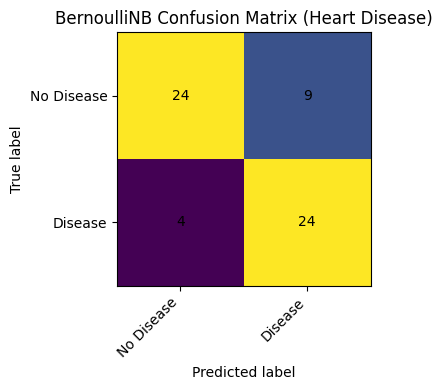

In [ ]:
model_bnb = BernoulliNB(alpha=1.0)

model_bnb.fit(X_train_bnb, y_train)
y_pred_bnb = model_bnb.predict(X_test_bnb)

names = df.target_binary

names = ['No Disease', 'Disease']  # Class labels
summarize_metrics(y_test, y_pred_bnb, names)
cm_bnb = confusion_matrix(y_test, y_pred_bnb)
plot_confusion_matrix(cm_bnb, names, title='BernoulliNB Confusion Matrix (Heart Disease)')

LinearRegression (0/1) accuracy: 0.787

Classification report (Linear Regression):
               precision    recall  f1-score   support

  No Disease       0.83      0.76      0.79        33
     Disease       0.74      0.82      0.78        28

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



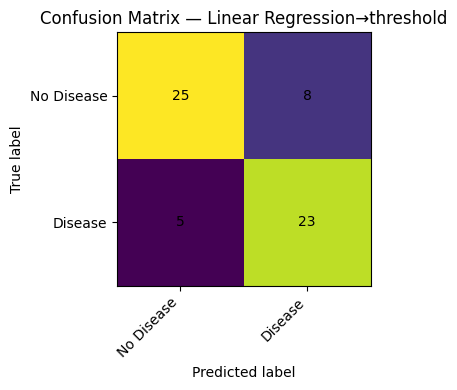

In [ ]:
# Comparing to Linear Regression again to see if there's a difference
lr = LinearRegression()
lr.fit(X_train_bnb, y_train)        # regress on 0/1
score_lr = lr.predict(X_test_bnb)
yhat_lr = (score_lr >= 0.5).astype(int)

labels = ['No Disease', 'Disease']

print("LinearRegression (0/1) accuracy:", round(accuracy_score(y_test, yhat_lr), 3))
print("\nClassification report (Linear Regression):\n", classification_report(y_test, yhat_lr, target_names=labels))
cm_lr = confusion_matrix(y_test, yhat_lr)
plot_confusion_matrix(cm_lr, labels, title="Confusion Matrix — Linear Regression→threshold")

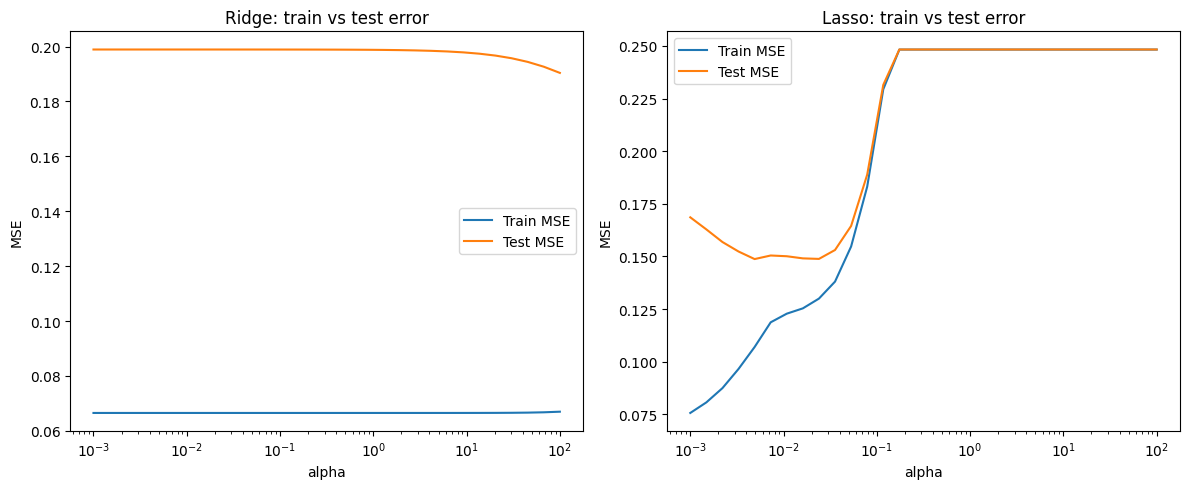

In [ ]:
# 3. Polynomial features (degree 10)
poly = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly.fit_transform(X_train_bnb)
X_poly_test = poly.transform(X_test_bnb)

# 4. Loop over alphas
alphas = np.logspace(-3, 2, 30)
mse_ridge_train, mse_ridge_test = [], []
mse_lasso_train, mse_lasso_test = [], []

for a in alphas:
    ridge = Ridge(alpha=a).fit(X_poly, y_train)
    lasso = Lasso(alpha=a, max_iter=10000).fit(X_poly, y_train)

    y_ridge_tr, y_ridge_te = ridge.predict(X_poly), ridge.predict(X_poly_test)
    y_lasso_tr, y_lasso_te = lasso.predict(X_poly), lasso.predict(X_poly_test)

    mse_ridge_train.append(mean_squared_error(y_train, y_ridge_tr))
    mse_ridge_test.append(mean_squared_error(y_test, y_ridge_te))
    mse_lasso_train.append(mean_squared_error(y_train, y_lasso_tr))
    mse_lasso_test.append(mean_squared_error(y_test, y_lasso_te))

# 5. Plot validation curves
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.semilogx(alphas, mse_ridge_train, label="Train MSE")
plt.semilogx(alphas, mse_ridge_test, label="Test MSE")
plt.xlabel("alpha"); plt.ylabel("MSE")
plt.title("Ridge: train vs test error")
plt.legend()

plt.subplot(1,2,2)
plt.semilogx(alphas, mse_lasso_train, label="Train MSE")
plt.semilogx(alphas, mse_lasso_test, label="Test MSE")
plt.xlabel("alpha"); plt.ylabel("MSE")
plt.title("Lasso: train vs test error")
plt.legend()

plt.tight_layout(); plt.show()

In [ ]:
# Check which features Lasso zeros out
lasso_best = Lasso(alpha=0.01)
lasso_best.fit(X_train_bnb, y_train)

# Show coefficients
coef_df = pd.DataFrame({
    'feature': X_train_bnb.columns,
    'coefficient': lasso_best.coef_
}).sort_values('coefficient', key=abs, ascending=False)

print(coef_df)


      feature  coefficient
6        cp_4     0.301175
13   thal_3.0    -0.175936
2       exang     0.119528
10    slope_1    -0.104719
15   thal_7.0     0.103573
7   restecg_0    -0.093197
0         sex     0.080132
11    slope_2     0.035481
5        cp_3    -0.020751
4        cp_2     0.000000
1         fbs    -0.000000
3        cp_1    -0.000000
8   restecg_1     0.000000
9   restecg_2     0.000000
12    slope_3    -0.000000
14   thal_6.0     0.000000


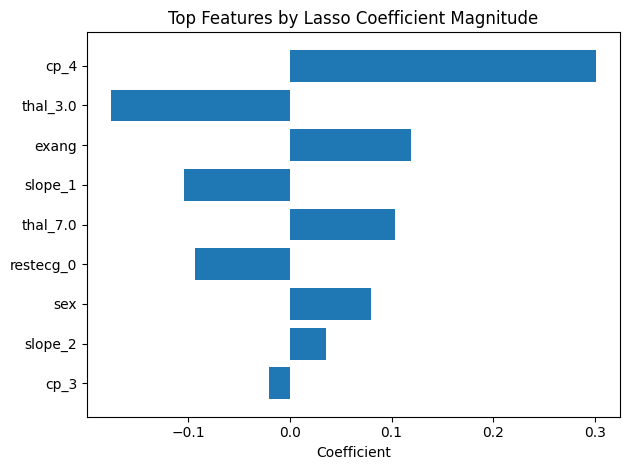

In [ ]:
# Bar plot of top 9 coefficients by absolute value
top_features = coef_df.head(9).sort_values('coefficient', key=abs, ascending=True)
plt.barh(top_features['feature'], top_features['coefficient'])
plt.xlabel('Coefficient')
plt.title('Top Features by Lasso Coefficient Magnitude')
plt.tight_layout()

Lasso accuracy: 0.7868852459016393


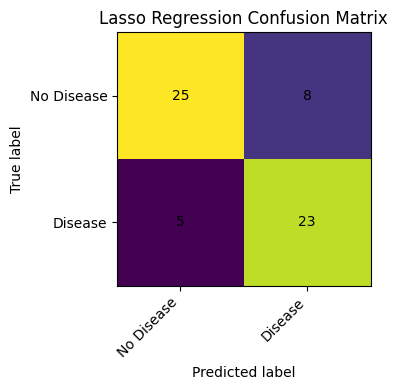

In [ ]:
# Use the best Lasso model
lasso_best = Lasso(alpha=0.01)
lasso_best.fit(X_train_bnb, y_train)
y_pred_lasso = lasso_best.predict(X_test_bnb)
yhat_lasso = (y_pred_lasso >= 0.5).astype(int)  # Threshold at 0.5

names = ['No Disease', 'Disease']
print("Lasso accuracy:", accuracy_score(y_test, yhat_lasso))
cm_lasso = confusion_matrix(y_test, yhat_lasso)
plot_confusion_matrix(cm_lasso, names, title='Lasso Regression Confusion Matrix')